In [1]:
from RBF import RBFNetwork
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from funcoes import fbr
import matplotlib.pyplot as plt


diretorio = "DADOS LEONARDO/BoroLítio.xlsx"
df = pd.read_excel(diretorio)
df = df.sort_values(by='Litio(mol%)').dropna()[['Litio(mol%)','Boro(mol%)','Tg(K)']].drop_duplicates('Litio(mol%)')


x = np.array(df.iloc[:,0:2])
y = np.array(df.iloc[:,-1])
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [2]:
sinapses, polos, y_pred, sigma = RBFNetwork.treinamento(x_treino,y_treino, 2, 4, 200)

In [3]:
y_pred_teste = RBFNetwork.teste(x_teste,2,polos,sinapses, 4)

In [4]:
data = np.loadtxt('rbf_petra_vidrenova/rbf_for_tf2-master/data/data.txt')

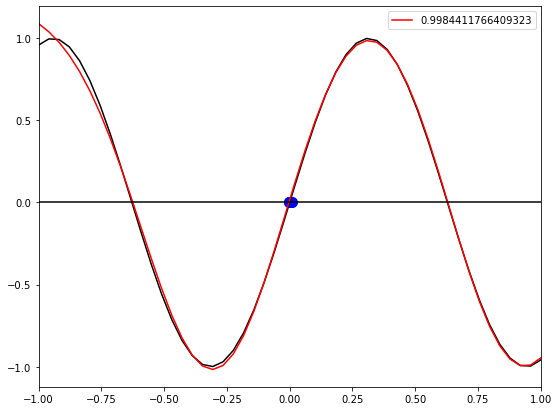

In [5]:
x = data[:,:-1]
y = data[:,-1]

sinapses,polos,y_pred,sigma = RBFNetwork.treinamento(x,y,7,4,200)
r2 = r2_score(y,y_pred)
plt.figure(figsize = (9,7))
plt.plot(x,y, color = 'black')
plt.plot(x,y_pred, color = 'red', label = r2)
plt.plot([-1, 1], [0, 0], color='black')
plt.xlim([-1, 1])


for i in range(polos.shape[0]):
    plt.scatter(polos[i]/100,0, color = 'blue', s = 100, marker = 'o')

plt.legend()
plt.show()

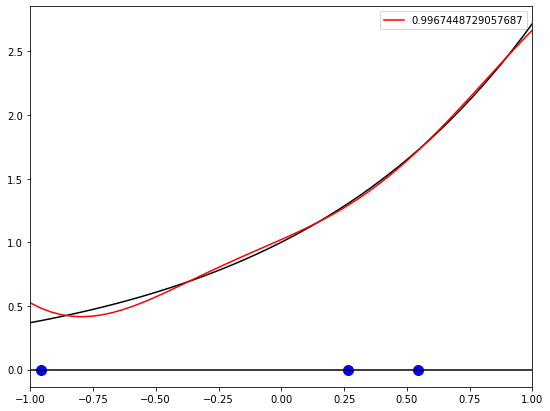

In [6]:
y1 = np.exp(x)
y1 = np.array(pd.DataFrame(y1.reshape(-1,1))[0])
sinapses,polos,y_pred,sigma = RBFNetwork.treinamento(x,y1,3,4,200)
r2 = r2_score(y1,y_pred)
plt.figure(figsize = (9,7))
plt.plot(x,y1, color = 'black')
plt.plot(x,y_pred, color = 'red', label = r2)
plt.plot([-1, 1], [0, 0], color='black')
plt.xlim([-1, 1])


for i in range(polos.shape[0]):
    plt.scatter(polos[i],0, color = 'blue', s = 100, marker = 'o')

plt.legend()
plt.show()

In [7]:
from scipy import *
n = 1000
     
x2 = mgrid[-1:1:complex(0,n)].reshape(n, 1)
    
y2 = sin(3*(x2+0.5)**3 - 1)
    
     

/tmp/ipykernel_15008/1266781602.py:6: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  y2 = sin(3*(x2+0.5)**3 - 1)


In [8]:
y2 = np.array(pd.DataFrame(y2)[0])

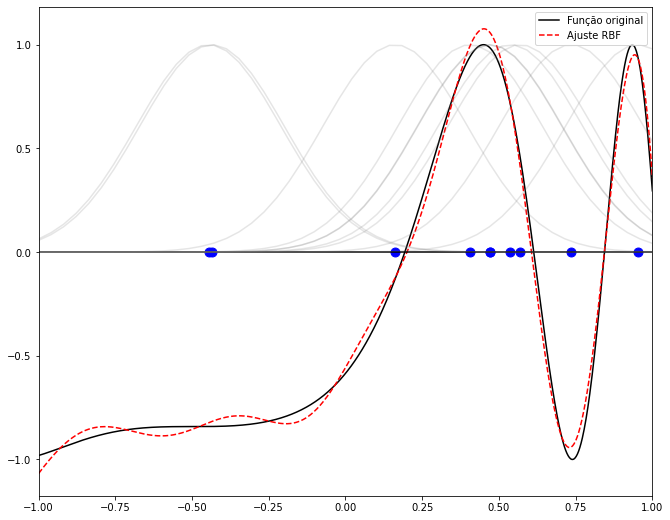

In [9]:
sinapses,polos,y_pred,sigma = RBFNetwork.treinamento(x2,y2,10,4,200)
r2 = r2_score(y2,y_pred)
k = 1 / (2 * sigma ** 2)

plt.figure(figsize = (11,9))
plt.plot(x2,y2, color = 'black', label = 'Função original')
plt.plot(x2,y_pred, 'r--', label = 'Ajuste RBF', )

for k in range(0,polos.shape[0]):
    plt.scatter(polos[k],0, s = 80, c = 'blue', marker = 'o')

plt.plot([-1, 1], [0, 0], color='black')
plt.xlim([-1, 1])

F = np.zeros((x.shape[0],polos.shape[0]))
for i in range(0,x.shape[0]):
    for j in range(0,polos.shape[0]):
        F[i,j] = np.exp(-k*(x[i] - polos[j])**2)

    
for n in range(0,F.shape[1]):
    plt.plot(x,F[:,n], color = 'gray', alpha = 0.2)
    
    
plt.legend()
plt.show()

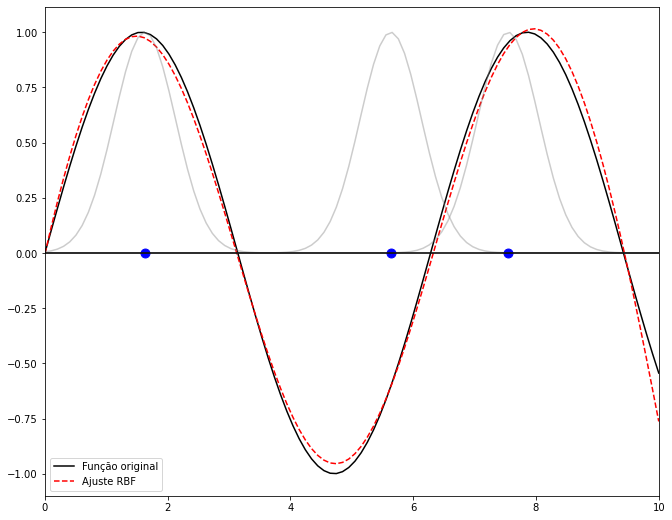

In [10]:
x = np.linspace(0, 10, 100).reshape(-1,1)
y = np.sin(x)
y = np.array(pd.DataFrame(y)[0])

sinapses,polos,y_pred,sigma = RBFNetwork.treinamento(x,y,3,4,200)

plt.figure(figsize = (11,9))
plt.plot(x,y, color = 'black', label = 'Função original')
plt.plot(x,y_pred, 'r--', label = 'Ajuste RBF', )

for k in range(0,polos.shape[0]):
    plt.scatter(polos[k],0, s = 80, c = 'blue', marker = 'o')
    

F = np.zeros((x.shape[0],polos.shape[0]))
for i in range(0,x.shape[0]):
    for j in range(0,polos.shape[0]):
        F[i,j] = np.exp(-k*(x[i] - polos[j])**2)

    
for n in range(0,F.shape[1]):
    plt.plot(x,F[:,n], color = 'gray', alpha = 0.4)
    
plt.plot([0, 10], [0, 0], color='black')
plt.xlim([0,10])

plt.legend()
plt.show()



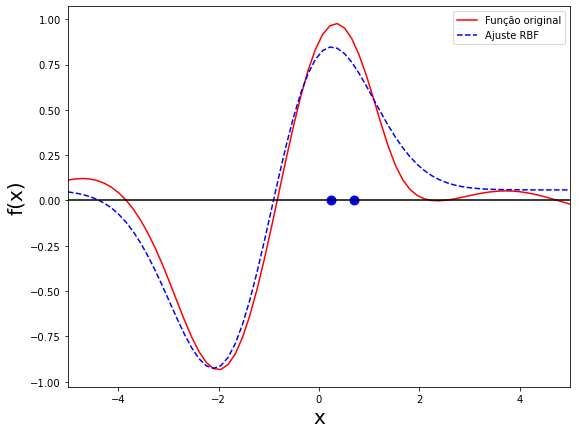

In [11]:
x1 = np.linspace(-5,5,70).reshape(-1,1)
y1 = np.linspace(-5,5,70).reshape(-1,1)
X1 = np.hstack((x1,y1))
z1 = (np.sin(np.sqrt((x1 - 2.)**2 + (y1 - 1)**2)) -
     np.sin(np.sqrt((x1 + 2.)**2 + (y1 + 4)**2))) / 2.
Y1 = np.array(pd.DataFrame(z1)[0])


sinapses1, polos1, y_pred1, sigma1 = RBFNetwork.treinamento(X1,Y1,2,4,200)

k1 = 1 / 2*(sigma1**2)
plt.figure(figsize = (9,7))
plt.plot(X1[:,0],Y1, color = 'red',label = 'Função original')
plt.plot(X1[:,0],y_pred1, 'b--', label = 'Ajuste RBF')

for i in range(0,polos1.shape[0]):
    plt.scatter(polos1[i][0], 0, s= 80,color = 'b')


# AJUSTE DOS DETALHES DA IMAGEM    
plt.plot([X1.min(), X1.max()], [0,0], color = 'black')
plt.xlim([X1.min(), X1.max()])
plt.xlabel('x', fontsize = 20)
plt.ylabel('f(x)', fontsize = 20)
plt.legend()
plt.show()


In [12]:
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z = (np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2)) -
     np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))) / 2.


X = np.asarray(list(zip(x.flatten(), y.flatten())))

sinapses, polos, y_pred, sigma = RBFNetwork.treinamento(X,z.flatten(),70,4,200)


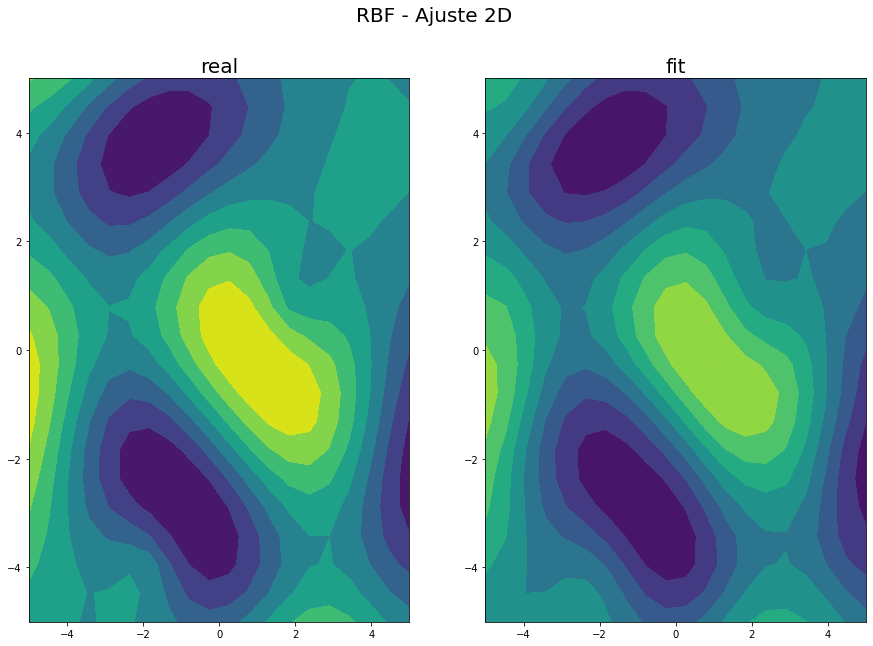

In [13]:
# plotting 2D interpolation
figure, (axis_left, axis_right) = plt.subplots(1, 2, figsize=(15, 10), sharey=False)
figure.suptitle('RBF - Ajuste 2D', fontsize=20)
axis_right.set_title('fit', fontsize=20)
axis_left.set_title('real', fontsize=20)
axis_left.contourf(x, y, z)

axis_right.contourf(x, y, y_pred.reshape(20, 20))

plt.show()

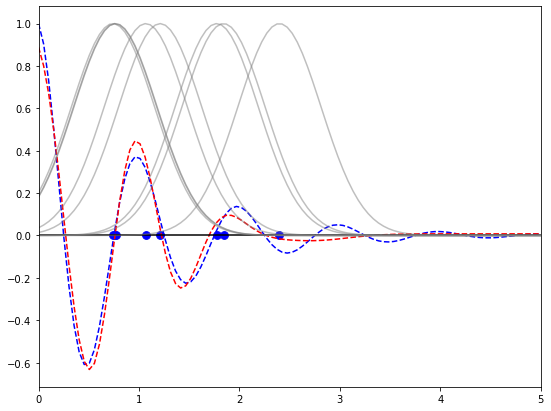

In [14]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.linspace(0.0, 5.0, 100).reshape(-1,1)
y = f(t1).flatten()
n = 8
sinapses, polos, y_pred, sigma = RBFNetwork.treinamento(t1,y,n,4,200)


plt.figure(figsize = (9,7))
plt.plot(t1,y, 'b--')
plt.plot(t1,y_pred, 'r--')
plt.plot([0,5],[0,0], color = 'black')
plt.xlim([t1.min(), t1.max()])
for i in range(0, polos.shape[0]):
    plt.scatter(polos[i],0, color = 'blue', marker = 'o', s = 60)
G = np.zeros((t1.shape[0],n))
k = 1/2*(sigma**2)
for i in range(t1.shape[0]):
    for j in range(n):
        G[i,j] = fbr.fbr(4,t1[i],polos[j],sigma)
for k in range(0,G.shape[1]):
    plt.plot(t1,G[:,k], color = 'grey', alpha = 0.5)

plt.show()